<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Tarea_Ajuste_de_curvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [25]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


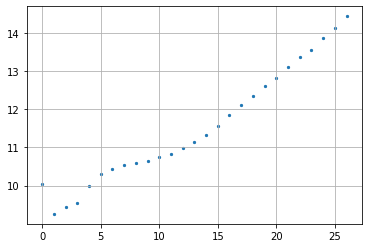

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 26, 27)
y = data

plt.figure()
plt.scatter(x,y, s =5)
plt.grid()

In [28]:
def f_costo(beta,X,y):
    m,n = X.shape
    beta = np.reshape(beta, [n,1])
    prediccion = X @ beta 
    error = prediccion - y
    return (error.T @ error)[0][0]

In [29]:
m = len(y) # numero de muestras
ones = np.ones([m,1])
x1 = np.reshape(x, [m, 1])

X = np.hstack((ones, x1))

In [30]:
beta_inicial = np.random.rand(2, 1)
beta_inicial

array([[0.43421586],
       [0.37067843]])

In [31]:
y_vector = np.reshape(y, [m, 1])

In [32]:

import scipy.optimize as opt
sol = opt.minimize(f_costo,beta_inicial, args=(X,y))
beta=np.reshape(sol.x,[2,1])
sol

<ipython-input-32-78dcd1d5292c>:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(f_costo,beta_inicial, args=(X,y))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1612852497525097e-12
        x: [ 1.005e+01 -2.661e-08]
      nit: 4
      jac: [-1.847e-13  1.553e-12]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 18
     njev: 6

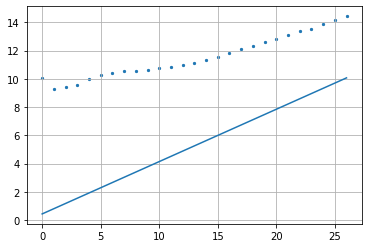

In [33]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@beta_inicial)
plt.grid()

In [34]:
f_costo(beta_inicial, X, y_vector)

1125.8440381135918

In [35]:
sol = opt.minimize(f_costo, beta_inicial, args=(X, y_vector))
sol

<ipython-input-35-f20cf28b94ac>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(f_costo, beta_inicial, args=(X, y_vector))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.370488951815375
        x: [ 9.116e+00  1.867e-01]
      nit: 3
      jac: [-5.960e-08 -1.192e-06]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 15
     njev: 5

In [36]:
beta = np.reshape(sol.x, [2, 1])
beta

array([[9.11567633],
       [0.18667056]])

### Solución de primer grado

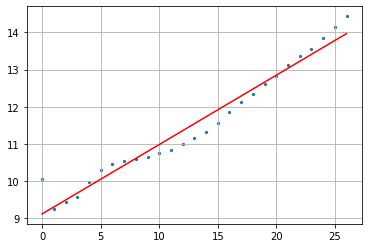

In [37]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X @ beta, "r")

plt.grid()

In [38]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1]) 
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))

In [39]:
beta_inicial2 = np.random.rand(3,1)
y2=np.reshape(y,[m,1])

In [40]:
sol2=opt.minimize(f_costo,beta_inicial2, args=(X2,y2))
sol2

<ipython-input-40-ef6e7cda2f4f>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol2=opt.minimize(f_costo,beta_inicial2, args=(X2,y2))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8443845194037836
        x: [ 9.591e+00  7.252e-02  4.390e-03]
      nit: 10
      jac: [-2.980e-08 -1.490e-08 -2.980e-08]
 hess_inv: [[ 1.443e-01 -2.176e-02  6.843e-04]
            [-2.176e-02  4.575e-03 -1.642e-04]
            [ 6.843e-04 -1.642e-04  6.316e-06]]
     nfev: 56
     njev: 14

### Solución de Segundo grado

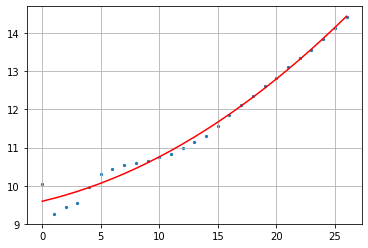

In [41]:
plt.figure()
plt.scatter(x,y,s=5)
beta2=np.reshape(sol2.x,[3,1])
plt.plot(x,X2@beta2,"r") 
plt.grid()

In [42]:
type(x)

numpy.ndarray

In [43]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1]) # da forma a las x en 1 columna
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))

In [44]:
beta_inicial3 = np.random.rand(4,1)
y3=np.reshape(y,[m,1])

In [45]:
sol3=opt.minimize(f_costo,beta_inicial3, args=(X3,y3))
sol3

<ipython-input-45-f62772efb6db>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol3=opt.minimize(f_costo,beta_inicial3, args=(X3,y3))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.8404237541444569
        x: [ 9.566e+00  8.510e-02  3.160e-03  3.157e-05]
      nit: 6
      jac: [-1.731e-02 -1.206e-01 -1.123e+00 -1.239e+00]
 hess_inv: [[ 2.272e-01 -6.412e-02  4.835e-03 -1.064e-04]
            [-6.412e-02  2.619e-02 -2.282e-03  5.431e-05]
            [ 4.835e-03 -2.282e-03  2.139e-04 -5.321e-06]
            [-1.064e-04  5.431e-05 -5.321e-06  1.364e-07]]
     nfev: 277
     njev: 53

Solución de Tercer grado

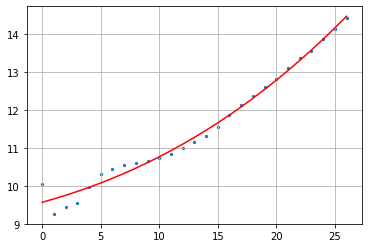

In [46]:
plt.figure()
plt.scatter(x,y,s=5)
beta3=np.reshape(sol3.x,[4,1])
plt.plot(x,X3@beta3,"r") 
plt.grid()

In [47]:
print(sol.fun)
print(sol2.fun)
print(sol3.fun)

2.370488951815375
0.8443845194037836
0.8404237541444569


Por lo tanto la función 3 es la que tiene mejor ajuste

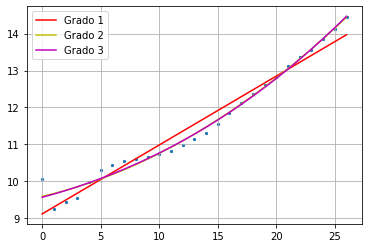

In [48]:
%matplotlib inline
x=np.linspace(0,26,27)
y=data
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(X@sol.x,"r",label="Grado 1")
plt.plot(x,X2@sol2.x,"y",label="Grado 2")
plt.plot(x,X3@sol3.x,"m",label="Grado 3")
plt.legend(loc="best")
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [73]:
import pandas as pd

archivo = 'population_data.csv'

df = pd.read_csv(archivo)
df

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [84]:
x = df['Year']-1950
y = df['Poblacion']
m = len(y)

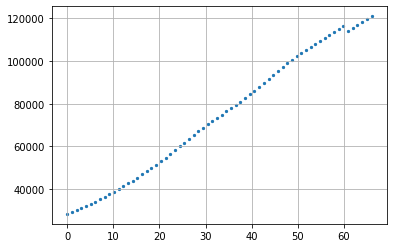

In [83]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(0, nd, nd)
y1 = y

plt.figure()
plt.scatter(x1,y1, s =5)
#plt.plot(x , 5 + 1*x, "r")
plt.grid()

In [85]:
x = np.array(x)
y = np.array(y)


In [86]:
ones=np.ones([m,1]) 
x1 = np.reshape(x,[m,1]) 
X=np.hstack((ones,x1))

In [87]:
beta_i1=np.random.rand(2,1)
yv=np.reshape(y,[m,1])

Ecuación de grado 1

In [88]:
solp1=opt.minimize(f_costo,beta_i1, args=(X,yv))
solp1

<ipython-input-88-1af235ca5bfb>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  solp1=opt.minimize(f_costo,beta_i1, args=(X,yv))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 212137169.5633493
        x: [ 2.414e+04  1.544e+03]
      nit: 8
      jac: [ 0.000e+00  2.000e+00]
 hess_inv: [[ 2.932e-08 -6.662e-10]
            [-6.662e-10  5.346e-06]]
     nfev: 159
     njev: 49

Ecuación de segundo grado

In [89]:
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))
beta_i2=np.random.rand(3,1)
solp2=opt.minimize(f_costo,beta_i2, args=(X2,yv))
solp2

<ipython-input-89-5d3c8d7cabc9>:4: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  solp2=opt.minimize(f_costo,beta_i2, args=(X2,yv))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 210941621.46381915
        x: [ 2.443e+04  1.517e+03  4.147e-01]
      nit: 8
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 6.417e-02 -3.919e-03  4.986e-05]
            [-3.919e-03  3.247e-04 -4.675e-06]
            [ 4.986e-05 -4.675e-06  7.193e-08]]
     nfev: 40
     njev: 10

Ecuación de tercer grado

In [90]:
m=len(y)
ones=np.ones([m,1]) #matriz de 1
x1 = np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))
beta_i3=np.random.rand(4,1)
solp3=opt.minimize(f_costo,beta_i3, args=(X3,yv))
solp3

<ipython-input-90-61f249a75535>:8: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  solp3=opt.minimize(f_costo,beta_i3, args=(X3,yv))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 25240442.64567985
        x: [ 2.848e+04  7.391e+02  3.056e+01 -3.092e-01]
      nit: 8
      jac: [ 0.000e+00  0.000e+00  0.000e+00 -2.500e-01]
 hess_inv: [[ 5.111e-02 -2.167e-03 -1.078e-06  4.080e-07]
            [-2.167e-03  1.243e-04  5.822e-08 -2.807e-08]
            [-1.078e-06  5.822e-08  1.063e-09 -3.331e-11]
            [ 4.080e-07 -2.807e-08 -3.331e-11  7.910e-12]]
     nfev: 236
     njev: 45

In [92]:
beta=np.reshape(solp1.x,[2,1])
beta2=np.reshape(solp2.x,[3,1])
beta3=np.reshape(solp3.x,[4,1])

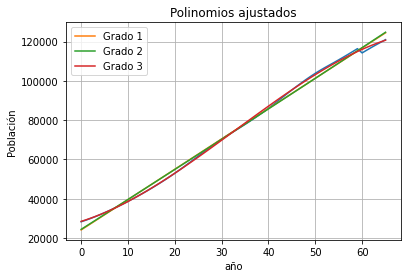

In [93]:
plt.figure()
plt.title("Polinomios ajustados")
plt.plot(x,y)
plt.plot(x,X@beta,label="Grado 1")
plt.plot(x,X2@beta2,label="Grado 2")
plt.plot(x,X3@beta3,label="Grado 3")
plt.legend(loc="best")
plt.xlabel("año")
plt.ylabel("Población")
plt.grid()

In [94]:
error=np.array([solp1.fun,solp2.fun,solp3.fun])
e=np.reshape(error,[3,1])


In [95]:
error=np.array([solp1.fun,solp2.fun,solp3.fun])
e=np.reshape(error,[3,1])


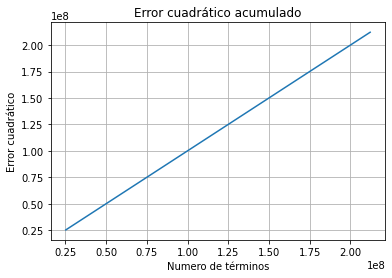

In [97]:
plt.figure()
plt.plot(error,e)
plt.title("Error cuadrático acumulado")
plt.xlabel("Numero de términos")
plt.ylabel("Error cuadrático")
plt.grid()

In [99]:
print(solp1.fun)
print(solp2.fun)
print(solp3.fun)

212137169.5633493
210941621.46381915
25240442.64567985


Por lo tanto la función con menos error es la función de segundo grado.

In [101]:
year=df["Year"]-1950
population=df["Nacimientos"]
x=np.array(year)
y=np.array(population)

In [102]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
X=np.hstack((ones,x1))
beta_i1=np.random.rand(2,1)
yv=np.reshape(y,[m,1])
soln1=opt.minimize(f_costo,beta_i1, args=(X,yv))
soln1

<ipython-input-102-1b7f19fc9b5a>:7: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  soln1=opt.minimize(f_costo,beta_i1, args=(X,yv))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4737912272100.02
        x: [ 1.563e+06  2.198e+04]
      nit: 5
      jac: [ 0.000e+00  6.554e+04]
 hess_inv: [[ 2.943e-02 -6.715e-04]
            [-6.715e-04  2.068e-05]]
     nfev: 162
     njev: 50

In [103]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))
beta_i2=np.random.rand(3,1)
soln2=opt.minimize(f_costo,beta_i2,args=(X2,yv))
soln2

<ipython-input-103-100315e0f58d>:7: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  soln2=opt.minimize(f_costo,beta_i2,args=(X2,yv))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 492921061156.8349
        x: [ 1.021e+06  7.278e+04 -7.815e+02]
      nit: 12
      jac: [ 0.000e+00  0.000e+00 -2.048e+04]
 hess_inv: [[ 1.923e-04  1.464e-04 -2.878e-06]
            [ 1.464e-04  1.311e-04 -2.554e-06]
            [-2.878e-06 -2.554e-06  5.183e-08]]
     nfev: 223
     njev: 53

In [104]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))
beta_i3=np.random.rand(4,1)
soln3=opt.minimize(f_costo,beta_i3, args=(X3,yv))
soln3

<ipython-input-104-f503b9cde487>:8: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  soln3=opt.minimize(f_costo,beta_i3, args=(X3,yv))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 441782338477.2277
        x: [ 1.088e+06  5.987e+04 -2.812e+02 -5.132e+00]
      nit: 11
      jac: [ 0.000e+00  8.192e+03  4.628e+05  2.396e+07]
 hess_inv: [[ 3.003e-03 -1.603e-03  6.817e-05 -7.086e-07]
            [-1.603e-03  8.562e-04 -3.653e-05  3.806e-07]
            [ 6.817e-05 -3.653e-05  1.634e-06 -1.758e-08]
            [-7.086e-07  3.806e-07 -1.758e-08  1.937e-10]]
     nfev: 145
     njev: 29

In [105]:
beta=np.reshape(soln1.x,[2,1])
beta2=np.reshape(soln2.x,[3,1])
beta3=np.reshape(soln3.x,[4,1])

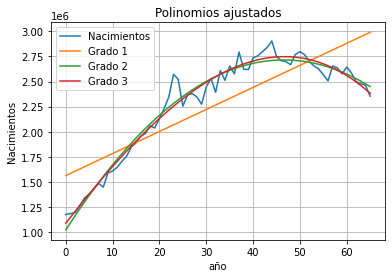

In [106]:
plt.figure()
plt.title("Polinomios ajustados")
plt.plot(x,y,label="Nacimientos")
plt.plot(x,X@beta,label="Grado 1")
plt.plot(x,X2@beta2,label="Grado 2")
plt.plot(x,X3@beta3,label="Grado 3")
plt.legend(loc="best")
plt.xlabel("año")
plt.ylabel("Nacimientos")
plt.grid()

In [107]:
error=np.array([soln1.fun,soln2.fun,soln3.fun])
en=np.reshape(error,[3,1])
en

array([[4.73791227e+12],
       [4.92921061e+11],
       [4.41782338e+11]])

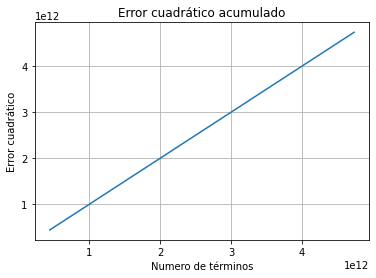

In [109]:
plt.figure()
plt.plot(error,en)
plt.title("Error cuadrático acumulado")
plt.xlabel("Numero de términos")
plt.ylabel("Error cuadrático")
plt.grid()

In [110]:
print(soln1.fun)
print(soln2.fun)
print(soln3.fun)

4737912272100.02
492921061156.8349
441782338477.2277


La función que se ajusta mejor es la función de tercer grado